# Proyecto 2 de programación
**Atzi Merino**

Imports

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

Clases

In [30]:
#Esta clase contiene a los clasificadores dados
#Junto con las funciones que puede tener cada uno
class Clasificadores:
  clf_svm = SVC()
  clf_lr = LogisticRegression()
  clf_kn = KNeighborsClassifier()
  clf_dt = DecisionTreeClassifier()
  clf_rf = RandomForestClassifier()
  #Este metodo recibe como imput los datos de los tumores, los diagnosticos
  #y un clasificador
  def clasificar(x,y,clf):
    try:
      #Primero escala los datos ***
      x_escalado = StandardScaler().fit_transform(x)
      #Separa la x escalada y la y en conjuntos de prueba y de entrenamiento
      x_train, x_test, y_train, y_test = train_test_split(
          x_escalado, y, test_size=0.30, random_state=42)
      #Entrena al clasificador del imput con el conjunto entrenamiento
      clf.fit(x_train, y_train)
      #Predice los diagnósticos del conjunto de prueba
      f = clf.predict(x_test)
      #Devuelve la predicción de los diagnosticos con los diagnosticos reales
      return (f,y_test)
    #En caso de que no se haya elegido un clasificador de la lista marca error
    except AttributeError:
      print('Debes elegir un clasificador entre: svm, lr, kn, dt, rf')
    #Si no se eligió una columna existente en el archivo marcará error
    except KeyError as error:
      print('Debes elegir una columna existente en el archivo que importaste')
  #Este metodo recibe como imput una clase, conjuntos x y y, y un clasificador
  def exactitud(c,x,y,clf):
    #Usa la metodo clasificar para guardar las predicciones y los diagnosticos
    prediccion = c.clasificar(x,y,clf)[0]
    diagnostico= c.clasificar(x,y,clf)[1]
    #Cuenta cuantos acertó y devuelve una puntuación del 0 al 1
    try:
      contador = 0
      for i in range(len(diagnostico)):
        if diagnostico[i] == prediccion[i]:
          contador += 1
      return contador/len(diagnostico)
    #En caso de que se haya elegido tamaño 0 para el conjunto de entrenamiento
    #marcará error
    except ZeroDivisionError:
      print('Debes elegir al menos un dato de entrenamiento')
  #Este metodo toma una clase, x, y, y 5 clasificadores
  #para determinar el de mayor exactitud
  def mejor_exactitud(c,x,y,clf1,clf2,clf3,clf4,clf5):
    #Guarda una lista con los clasificadores y una con sus exactitudes
    lista_clf = [clf1,clf2,clf3,clf4,clf5]
    lista_exactitud = [c.exactitud(c,x,y,clf1), c.exactitud(c,x,y,clf2),
                       c.exactitud(c,x,y,clf3), c.exactitud(c,x,y,clf4),
                       c.exactitud(c,x,y,clf5)]
    #Y luego guarda el índice del máximo de la lista de exactitudes
    mayor_exactitud = lista_exactitud.index(max(lista_exactitud))
    #Devuelve cuál de los clasificadores tuvo esa máxima exactitud
    return lista_clf[mayor_exactitud]
  #Este metodo toma una clase, x, y, y un clasificador
  def f1_weighted(c,x,y,clf):
    prediccion = c.clasificar(x,y,clf)[0]
    diagnostico= c.clasificar(x,y,clf)[1]
    #Devuelve la valuación f1 de ese clasificador con el average = weighted
    return f1_score(diagnostico, prediccion, average='weighted')
  #Hace lo mismo pero con average='micro'
  def f1_micro(c,x,y,clf):
    prediccion = c.clasificar(x,y,clf)[0]
    diagnostico= c.clasificar(x,y,clf)[1]
    return f1_score(diagnostico, prediccion, average='micro')
  #Hace lo mismo pero con average='macro'
  def f1_macro(c,x,y,clf):
    prediccion = c.clasificar(x,y,clf)[0]
    diagnostico= c.clasificar(x,y,clf)[1]
    return f1_score(diagnostico, prediccion, average='macro')
  #Este metodo toma una clase, x, y, 5 clasificadores, y una de las funciones f1
  #para determinar cual de los clasificadores tiene mejor valoración
  def mejor_f1(c,x,y,clf1,clf2,clf3,clf4,clf5,f1_func):
    lista_clf = [clf1,clf2,clf3,clf4,clf5]
    lista_f1 = [f1_func(c,x,y,clf1), f1_func(c,x,y,clf2),
                f1_func(c,x,y,clf3), f1_func(c,x,y,clf4),
                f1_func(c,x,y,clf5)]
    mayor_f1 = lista_f1.index(max(lista_f1))
    return lista_clf[mayor_f1]
  #Este metodo genera la matriz de confusión de un clasificador
  #Toma como imput una clase, un conjunto x e y
  def matriz_confusion(c,x,y,clf):
    prediccion = c.clasificar(x,y,clf)[0]
    diagnostico= c.clasificar(x,y,clf)[1]
    cm = confusion_matrix(diagnostico, prediccion, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    plt.show()

In [31]:
#Un extra fue agregar la clase de Agrupadores
class Agrupadores:
  #Tiene como atributo el KMeans
  agr_km = KMeans(n_clusters=2, random_state=0, n_init="auto")
  #Este proceso es similar al de clasificar
  #Agrupa los datos en k grupos, en este caso 2
  def agrupar(x,agr):
    try:
      agrupado = agr.fit(x)
      return agrupado
    except AttributeError:
      print('Solo puedes elegir agrupar con km')
    except KeyError:
      print('Debes elegir una columna existente en el archivo que importaste')
  #Este método determina su exactitud
  def exactitud_agr(c,x,y,agr):
    kmeans = c.agrupar(x,agr)
    lista_k = list(kmeans.labels_)
    lista_nueva =[]
    #Como el k-means devuelve el grupo 0 y el grupo 1
    #se le tuvo que cambiar el nombre para que coincidiera con los diagnosticos
    for m in lista_k:
      if m == 1:
        lista_nueva.append('M')
      else:
        lista_nueva.append('B')
    contador = 0
    for i in range(len(y)):
      if y[i] == lista_nueva[i]:
        contador += 1
    return contador/len(lista_nueva)

Funciones

In [32]:
#Esta función ayuda a procesar un acrchivo de tipo csv para tener los datos en
#medidas y en la columna de resultados
def x_y(ruta_csv, columna_resultados):
  try:
    df = pd.read_csv(ruta_csv)
    x = np.array(df.iloc[:,2:])
    y = list(df[columna_resultados])
    return (x,y)
  #En caso de elegir una columna inexistente marca error
  except KeyError:
    print('Debes elegir una columna existente en el archivo que importaste')
  #En caso de no encontrar el archivo advierte de importarlo antes
  except FileNotFoundError:
    print('Debes importar un archivo')
  #En caso de ser un archivo de otro tipo pide uno tipo csv
  except UnicodeDecodeError:
    print('Debes importar un archivo de tipo csv')

In [33]:
#Esta función es necesaria para aplicar el mejor tipo de promedio en el F1
#Dependiendo del balance de los datos se elige un tipo de promedio
def mejor_average(ruta_csv, columna_resultados):
  try:
    df = pd.read_csv(ruta_csv)
    y = list(df[columna_resultados])
    M = 0
    B = 0
    for r in y:
      if r == 'M':
        M += 1
      else:
        B += 1
    if (M/B >= 2 and M/B <= 3) or (B/M >= 2 and B/M <= 3):
      return 'micro'
    elif M/B > 3 or B/M > 3:
      return 'weighted'
    else:
      return 'macro'
  #En caso de marcar error de división entre 0 advierte de que se necesita
  #al menos un dato por caso
  except ZeroDivisionError:
    print('No tienes ningun dato de uno de los casos,es necesario que los tenga')

Main

In [34]:
#la función main toma un archivo, una columna del archivo, una clase
#5 clasificadores y un agrupador para responder a las preguntas
def main(ruta_csv, columna_resultados, c, a, clf1, clf2, clf3, clf4, clf5, agr):
  #Se trabajan los datos con la función x_y
  xy = x_y(ruta_csv, columna_resultados)
  #Se extrae la x y la y
  x = xy[0]
  y = xy[1]

  #Se determina el mejor average para el F1
  f1_average = mejor_average(ruta_csv, columna_resultados)

  #Se compara la exactitud de los datos usando el método mejor_exactitud
  print('Al comparar uno a uno los resultados dados con ' +
          'los resultados predecidos, el mejor algoritmo es '
        + str(c.mejor_exactitud(c, x, y, clf1, clf2, clf3, clf4, clf5)))
  print('Con una exactitud de ' + str(c.exactitud(
      c, x, y, c.mejor_exactitud(c, x, y, clf1, clf2, clf3, clf4, clf5))))

  #Se compara la exactitud de los datos usando el método mejor_exactitud
  #Se trabajo por casos dependiendo del mejor average ya determinado
  if f1_average == 'micro':
    print('El mejor promedio para ejecutar el F1 es ' + f1_average +
          '.\nY el mejor algoritmo tomando en cuenta la valoración F1 es '
          + str(c.mejor_f1(c, x, y, clf1, clf2, clf3, clf4, clf5, c.f1_micro)))
  elif f1_average == 'weighted':
    print('El mejor promedio para ejecutar el F1 es ' + f1_average +
          '.\nY el mejor algoritmo tomando en cuenta la valoración F1 es '
          + str(c.mejor_f1(c, x, y, clf1, clf2, clf3, clf4, clf5, c.f1_weighted)))
  else:
    print('El mejor promedio para ejecutar el F1 es ' + f1_average +
          '.\nY el mejor algoritmo tomando en cuenta la valoración F1 es '
          + str(c.mejor_f1(c,x,y, clf1, clf2, clf3, clf4, clf5, c.f1_macro)))

  #Se generan las 5 matrices de confusión
  c.matriz_confusion(c, x, y, clf1)
  c.matriz_confusion(c, x, y, clf2)
  c.matriz_confusion(c, x, y, clf3)
  c.matriz_confusion(c, x, y, clf4)
  c.matriz_confusion(c, x, y, clf5)

  #Se ejecuta el k-means
  print('Añadido a esto, el algoritmo de K-Means tuvo una exactitud de '
        + str(a.exactitud_agr(a, x, y, agr)))

Al comparar uno a uno los resultados dados con los resultados predecidos, el mejor algoritmo es LogisticRegression()
Con una exactitud de 0.9933333333333333
El mejor promedio para ejecutar el F1 es macro.
Y el mejor algoritmo tomando en cuenta la valoración F1 es LogisticRegression()


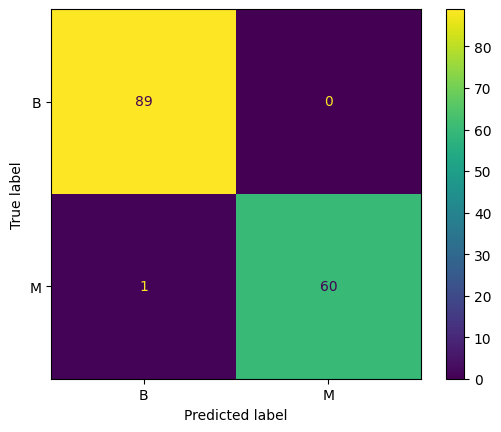

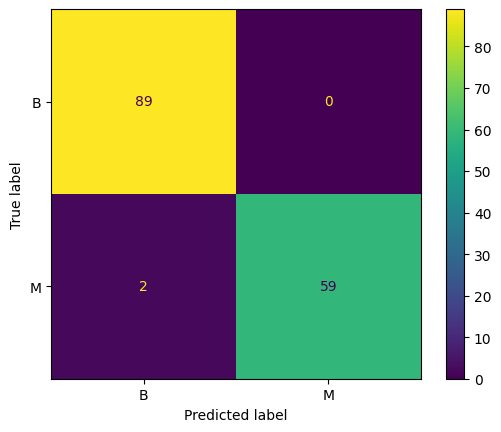

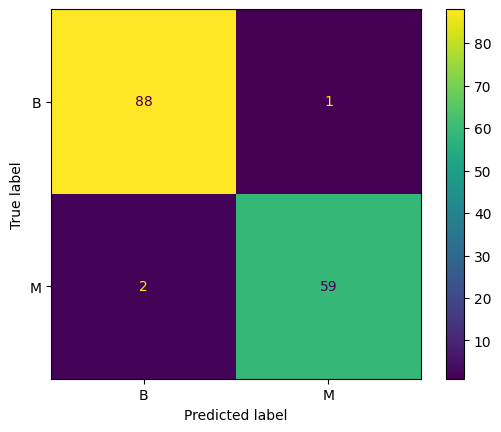

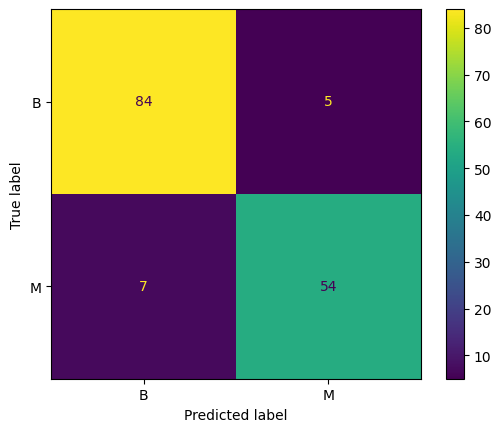

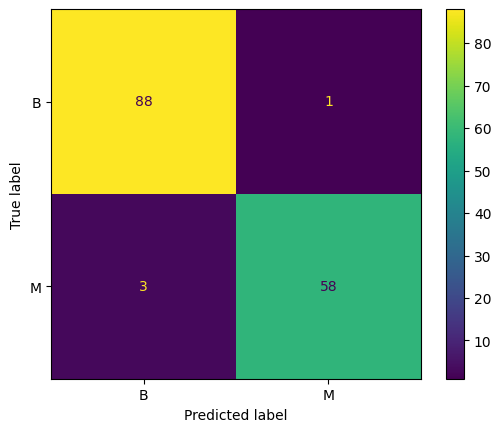

Añadido a esto, el algoritmo de K-Means tuvo una exactitud de 0.8476953907815631


In [35]:
if __name__ == "__main__":
  #Necesitamos un objeto de clase clasificadores
  c = Clasificadores
  a = Agrupadores
  #Se extrae cada clasificador de la clase
  SVM = c.clf_svm
  LR = c.clf_lr
  KN = c.clf_kn
  DT = c.clf_dt
  RF = c.clf_rf
  k_mean = a.agr_km
  #Se ejecuta el main sobre la base de datos de cancer
  main("cancer.csv", "diagnosis", c, a, LR, KN, SVM, DT, RF, k_mean)